<a href="https://www.kaggle.com/code/rhaianycezar/chatbot-arena-preference-prediction-llms?scriptVersionId=226393346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>LLM Classification Finetuning</h1>
<ul>
    <li><a href="#introducao">I. Introdução</a></li>
    <li><a href="#">II. Justificativa</a></li>
    <li><a href="#">III. Revisão</a></li>
    <li><a href="#">VI. Metodologia e Coleta de dados</a></li>
    <li><a href="#">V. Modelagem</a></li>
    <li><a href="#">VI. Resultados</a></li>
    <li><a href="#">VII. Conclusão</a></li>
</ul>

<h2 id="introducao">I. Introdução</h2>
<p>Os Modelos de Linguagem de Grande Escala (LLMs) têm se tornado cada vez mais presentes em nosso cotidiano, sendo amplamente utilizados em assistentes virtuais, chatbots e outras aplicações de inteligência artificial. No entanto, um dos desafios na adoção desses modelos é garantir que suas respostas sejam alinhadas às preferências humanas, proporcionando interações mais naturais e satisfatórias. Para resolver essa questão, abordagens baseadas em Aprendizado por Reforço a partir de Feedback Humano (RLHF - Reinforcement Learning from Human Feedback) vêm sendo aplicadas, permitindo que os modelos aprendam com escolhas e preferências reais dos usuários.</p>
<p>Neste contexto, a competição do Kaggle Chatbot Arena Preference Prediction propõe o desafio de prever qual resposta os usuários irão preferir em um confronto direto entre dois LLMs. A competição fornece um conjunto de dados onde cada entrada contém um prompt, duas respostas geradas por diferentes modelos e a escolha do usuário. O objetivo deste projeto é desenvolver um modelo de machine learning capaz de prever essas preferências com alta precisão, contribuindo para o aprimoramento da personalização e adaptação dos LLMs às necessidades individuais dos usuários.</p>
<p>Além de sua relevância acadêmica e científica, este estudo tem impacto direto no desenvolvimento de sistemas de IA mais eficientes e alinhados ao comportamento humano. Modelos de linguagem que compreendem melhor as preferências dos usuários podem melhorar significativamente a experiência em aplicações comerciais, educacionais e assistenciais, reduzindo vieses e proporcionando respostas mais úteis. Assim, a pesquisa proposta visa não apenas aprimorar a interação entre humanos e máquinas, mas também contribuir para o avanço da inteligência artificial responsável.</p>

<h3>1.1 O que é LLMs?</h3>
<p>LLMs (Large Language Models) são modelos de inteligência artificial treinados em grandes quantidades de dados textuais para entender e gerar linguagem de forma semelhante aos humanos. Eles são baseados em redes neurais profundas, especialmente arquiteturas como os Transformers, que permitem processar e relacionar palavras em um contexto extenso (Vaswani et al., 2017). Modelos populares como <b>GPT-4 (OpenAI, 2023)</b> e <b>BERT (Devlin et al., 2018)</b> são exemplos de LLMs amplamente utilizados em chatbots, assistentes virtuais e mecanismos de busca. Esses modelos continuam evoluindo com o uso de aprendizado por reforço com feedback humano (RLHF), que os ajuda a gerar respostas mais alinhadas às preferências dos usuários (Ouyang et al., 2022).</p>

<h2>II. Justificativa</h2>
<p>
Este projeto é fundamental para melhorar a personalização e a eficácia dos Modelos de Linguagem de Grande Escala (LLMs), garantindo que suas respostas estejam alinhadas com as preferências humanas. A previsibilidade das escolhas dos usuários em interações com chatbots é essencial para tornar a experiência mais natural e satisfatória, beneficiando diversas aplicações, como assistentes virtuais, atendimento ao cliente e educação digital. Além disso, a pesquisa contribui para o avanço do Aprendizado por Reforço a partir de Feedback Humano (RLHF), permitindo a criação de modelos mais éticos e menos enviesados. Ao aprimorar a capacidade dos LLMs de compreender e se adaptar às expectativas dos usuários, este estudo também auxilia no desenvolvimento de sistemas de IA mais confiáveis e responsivos, promovendo impactos positivos tanto na academia quanto na indústria.
</p>

<H2>III. Revisão Bibliografica</H2>
<p>
A revisão bibliográfica deste estudo aborda três pilares essenciais: Aprendizado por reforço a partir de feedback humano (RLHF), modelos de preferência e vieses em LLMs. Trabalhos anteriores demonstram que RLHF é uma abordagem eficaz para alinhar respostas de modelos de linguagem às preferências humanas, sendo amplamente utilizada no ajuste fino de chatbots e assistentes virtuais. Além disso, pesquisas sobre modelos de recompensa e previsão de preferências destacam a importância de técnicas de machine learning para entender padrões nas escolhas dos usuários. Por fim, estudos sobre viés em LLMs mostram que fatores como verbosidade, posição da resposta e autopromoção podem influenciar a percepção do usuário, tornando essencial a aplicação de técnicas que reduzam esses efeitos para garantir previsões mais precisas e justas.
</p>

<h2>VI. Requisitos</h2>
<ul>
    <li>Objetivo: Prever qual resposta os usuários preferirão em um confronto entre dois modelos de linguagem (LLMs).
Dados fornecidos: Conversas extraídas do Chatbot Arena, com prompts, respostas de dois LLMs e a escolha do usuário.</li>
    <li>Tarefa principal: Desenvolver um modelo de machine learning para prever as preferências humanas com alta precisão.</li> 
    <li>Desafios envolvidos:</li>
    <ol>
    <li>Viés de posição (respostas apresentadas primeiro podem ser favorecidas).</li>
    <li>Viés de verbosidade (respostas mais longas podem ser percebidas como melhores).</li>
    <li>Viés de autopromoção (respostas que elogiam o próprio modelo podem influenciar a escolha do usuário).</li>
    </ol>
    <li>Métrica de avaliação: Perda logarítmica entre as probabilidades previstas e os valores reais da escolha do usuário.</li>
    <li>Formato da submissão: Arquivo CSV contendo as probabilidades de preferência para cada modelo e para empate.</li>
    <li>Ferramentas recomendadas: Kaggle Notebooks (ambiente com suporte a Python, Jupyter e GPUs gratuitas).</li>
    <li>Competição contínua: A tabela de classificação é atualizada periodicamente e inscrições com mais de dois meses são invalidadas.</li>
    <li>Site da competição: https://www.kaggle.com/competitions/llm-classification-finetuning</li>
</ul>

In [19]:
import pandas as pd
dataTrain = pd.read_csv('/kaggle/input/llm-classification-finetuning/train.csv')
dataTest = pd.read_csv('/kaggle/input/llm-classification-finetuning/test.csv')

<h2>V. Metodologia</h2>
<h3>5.1. Coleta de Dados</h3>
<p>Os dados utilizados neste projeto vêm da Chatbot Arena, onde usuários interagem com dois chatbots diferentes para responder a um mesmo prompt. Após receber as respostas, os usuários escolhem qual preferem.</p>

A base de dados contém:
<ul>
    <li>ID do participante</li>
    <li>Modelo A e Modelo B (identificadores dos chatbots)</li>
    <li>Prompt (pergunta feita pelo usuário)</li>
    <li>Resposta A e Resposta B (respostas dos chatbots)</li>
    <li>Winner A, Winner B, Winner Tie (indicam qual resposta foi escolhida)</li>
</ul>
<p>Esses dados já estão coletados e prontos para serem processados e utilizados no treinamento do modelo.</p>

In [20]:
dataTrain.head(5)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [21]:
def searchModel():
    for j in ['model_a','model_b']:
        a=False
        for k in chatBot:
            if k == r[j]:
                a = True
                break
        if a==False:
            chatBot.update({r[j]:{'winner':0,'loss':0,'round':0}})

In [22]:
def winModel():
     chatBot[r['model_a']]['round']+=1
     chatBot[r['model_b']]['round']+=1
     if r['winner_model_a']==1:
         chatBot[r['model_a']]['winner']+=1
         chatBot[r['model_b']]['loss']+=1
     elif r['winner_model_b']==1:
         chatBot[r['model_b']]['winner']+=1
         chatBot[r['model_a']]['loss']+=1
     else:
         chatBot['winner_tie']['round']+=1

In [23]:
quest = {'char':0,'words':0}
modelA = {'char':0,'words':0}
modelB = {'char':0,'words':0}
chatBot = {'winner_tie':{'winner':0,'loss':0,'round':0}}
index = 0

for i,r in dataTrain.iterrows():
    quest['char'] += len(r['prompt'])
    quest['words'] += len(r['prompt'].split(' '))

    modelA['char'] += len(r['response_a'])
    modelA['words'] += len(r['response_a'].split(' '))

    modelB['char'] += len(r['response_b'])
    modelB['words'] += len(r['response_b'].split(' '))

    searchModel()

    winModel()


print("Numero de registros %d \n%d modelos testados \n%d empates\n\n"%(
    len(dataTrain), len(chatBot)-1, chatBot['winner_tie']['round']))
print("=======MÉDIA DE CARACTERES E PALAVRAS POR PERGUNTAS =========")
print("A média foi de %d caracteres e de %d palavras\n"%(
    quest['char']/len(dataTrain),
    quest['words']/len(dataTrain)))

print("=======MÉDIA DE CARACTERES E PALAVRAS MODELO A =========")
print("A média foi de %d caracteres e de %d palavras\n"%(
    modelA['char']/len(dataTrain),
    modelA['words']/len(dataTrain)))

print("=======MÉDIA DE CARACTERES E PALAVRAS MODELO B =========")
print("A média foi de %d caracteres e de %d palavras\n"%(
    modelB['char']/len(dataTrain),
    modelB['words']/len(dataTrain)))

Numero de registros 57477 
64 modelos testados 
17761 empates


=======MÉDIA DE CARACTERES E PALAVRAS POR PERGUNTAS =========
A média foi de 369 caracteres e de 60 palavras

=======MÉDIA DE CARACTERES E PALAVRAS MODELO A =========
A média foi de 1377 caracteres e de 214 palavras

=======MÉDIA DE CARACTERES E PALAVRAS MODELO B =========
A média foi de 1386 caracteres e de 216 palavras



In [24]:
chatBot = pd.DataFrame(chatBot)

In [25]:
chatBot = chatBot.T

In [26]:
chatBot['Taxa de Vitória (%)'] = (chatBot['winner'] / chatBot['round']) * 100

In [27]:
chatBot.sort_values('Taxa de Vitória (%)', ascending=True, inplace=True)

In [28]:
chatBot.loc['winner_tie', 'Taxa de Vitória (%)'] = (
    chatBot.loc['winner_tie', 'round'] / len(dataTrain)
) * 100

In [29]:
chatBot['Taxa de Vitória (%)'] = chatBot['Taxa de Vitória (%)'].round(2) 

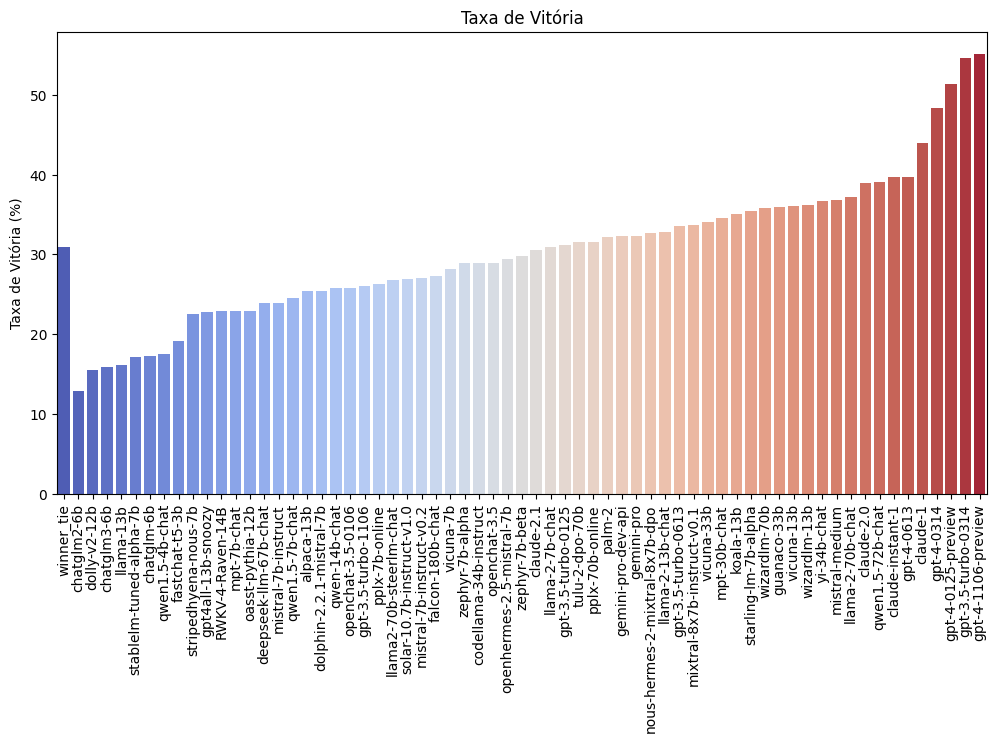

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=chatBot.index, y=chatBot['Taxa de Vitória (%)'], palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Taxa de Vitória (%)")
plt.title("Taxa de Vitória")
plt.show()

# **Taxa de Vitória: Análise:**
Modelos como GPT-4-1106-preview e Claude 2.0 provavelmente terão as maiores taxas de vitória, reforçando sua eficiência.<br/>
Modelos como ChatGLM3-6B e OpenChat-3.5 aparece com taxas menores, evidenciando seu desempenho inferior.<br/>
Esse gráfico destaca quais modelos têm maior sucesso nas rodadas disputadas.

In [31]:
cBot = {}
for i,r in chatBot.head(11).iterrows():
    if i != 'winner_tie':
        cBot.update({i:r})
for i,r in chatBot.tail(10).iterrows():
    cBot.update({i:r})

In [32]:
cBot = pd.DataFrame(cBot).T

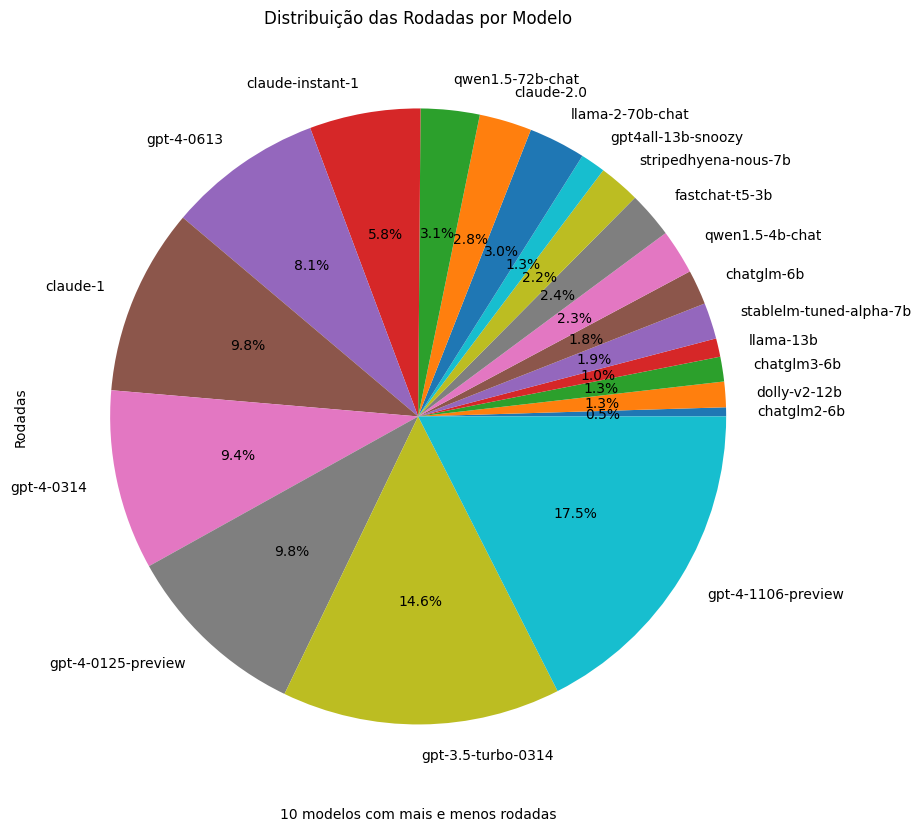

In [33]:
cBot.groupby(list(cBot))['round'].sum().plot.pie(
    autopct='%1.1f%%', figsize=(10, 10), labels=cBot.index)
plt.ylabel("Rodadas")
plt.xlabel("10 modelos com mais e menos rodadas")
plt.title("Distribuição das Rodadas por Modelo")
plt.show()

# **Participação de cada modelo no total de rodadas disputadas.** 
Modelos que participaram de mais rodadas (como GPT-4-1106-preview) terão fatias maiores, indicando maior amostragem nos testes.<br/>
Modelos que participaram de poucas rodadas terão fatias menores, o que pode impactar a confiabilidade dos seus resultados.<br/>
Esse gráfico é útil para identificar se o desempenho de um modelo foi baseado em um número significativo de rodadas ou se pode ser um caso isolado.

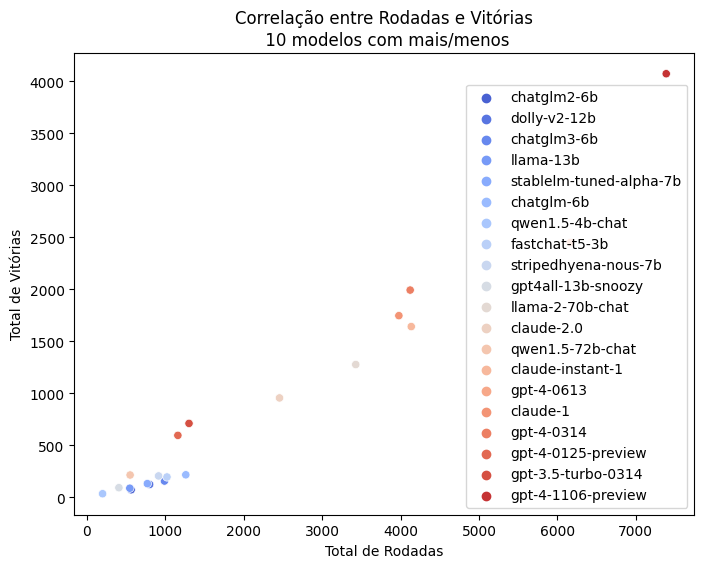

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = cBot['round'], 
                y = cBot['winner'], 
                hue = cBot.index, 
                palette="coolwarm")
plt.xlabel("Total de Rodadas")
plt.ylabel("Total de Vitórias")
plt.title("Correlação entre Rodadas e Vitórias\n 10 modelos com mais/menos")
plt.show()

# **Relação entre o número de rodadas disputadas e o número de vitórias**
Modelos com alto número de rodadas e alto número de vitórias estarão na parte superior direita do gráfico, mostrando desempenho consistente.<br/>
Modelos com muitas rodadas, mas poucas vitórias, estarão na parte inferior direita, sugerindo baixo desempenho.<br/>
Modelos com poucas rodadas e poucas vitórias ficarão na parte inferior esquerda, indicando menor relevância no teste.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


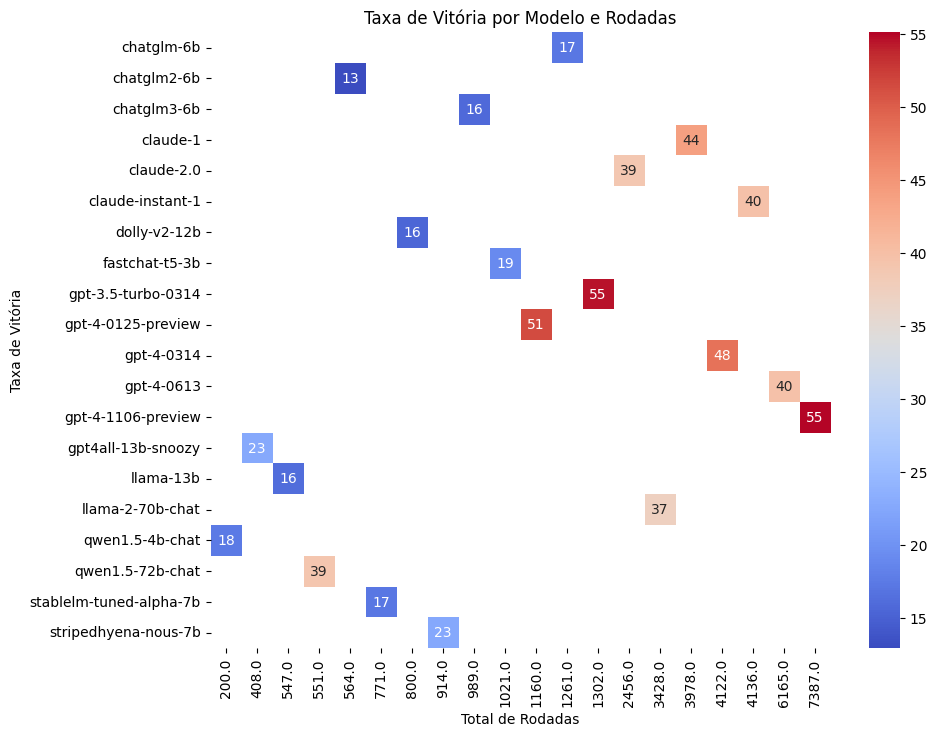

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cBot.pivot(columns='round', values='Taxa de Vitória (%)'), 
    cmap='coolwarm', 
    annot=True
)
plt.xlabel("Total de Rodadas")
plt.ylabel("Taxa de Vitória")
plt.title("Taxa de Vitória por Modelo e Rodadas")
plt.show()

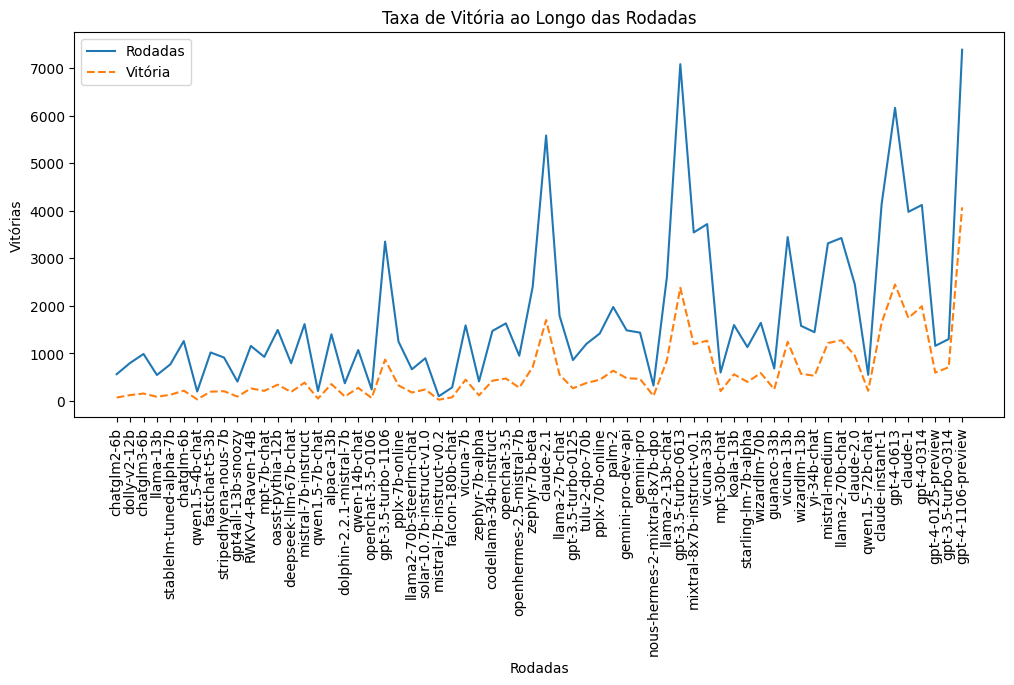

In [36]:
plt.figure(figsize=(12, 5))
plt.plot(chatBot['round'][1:], color='tab:blue', label='Rodadas', linestyle='-')
plt.plot(chatBot['winner'][1:], color='tab:orange', label='Vitória', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel('Rodadas')
plt.ylabel('Vitórias')
plt.title('Taxa de Vitória ao Longo das Rodadas')
plt.legend()
plt.show()